In [ ]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class SimAnneal(object):
    def __init__(self, N, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        self.N = N #is the size of solution
        self.T = math.sqrt(self.N) if T == -1 else T
        self.T_save = self.T  # save inital T to reset if batch annealing is used
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-8 if stopping_T == -1 else stopping_T
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1 # a counter for iterations

        self.best_solution = None
        self.best_fitness = float("Inf")
        self.fitness_list = []

    def initial_solution(self):
        """
        Greedy algorithm to get an initial solution (closest-neighbour).
        """
        solution = np.random.rand(6)

        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:  # If best found so far, update best fitness
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def fitness(self, solution):
        w=solution
        cur_fit =1/abs(4*w[0] - 2*w[1] + 3.5*w[2] + 5*w[3] - 11*w[4] - 4.7*w[5])
        return cur_fit

    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current.
        Depends on the current temperature and difference between candidate and current.
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current.
        Accept with probabilty p_accept(..) if candidate is worse.
        """
        candidate_fitness = self.fitness(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm.
        """
        # Initialize with the greedy solution.
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print("Starting annealing.")
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution) 
            #random.randint(start, stop) returns a integer value betwwen start and stop
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            #example candidate=[1,2,3,4,5]
            #l=4 and i= 0 ==> candidate[i : (i + l)]=[1,2,3,4]
            #reversed(candidate[i : (i + l)])=[4,3,2,1]
            #candidate=[4,3,2,1,5]
            self.accept(candidate)
            self.T *= self.alpha #Appy the geometric temprature reduction rule
            self.iteration += 1

            self.fitness_list.append(self.cur_fitness)

        print("Best fitness obtained: ", self.best_fitness)
        improvement = 100 * (self.fitness_list[0] - self.best_fitness) / (self.fitness_list[0])
        print(f"Improvement over greedy heuristic: {improvement : .2f}%")

    def batch_anneal(self, times=10):
        """
        Execute simulated annealing algorithm `times` times, with random initial solutions.
        """
        for i in range(1, times + 1):
            print(f"Iteration {i}/{times} -------------------------------")
            self.T = self.T_save
            self.iteration = 1
            self.cur_solution, self.cur_fitness = self.initial_solution()
            self.anneal()

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.show()

Starting annealing.
Best fitness obtained:  0.08670147676214088
Improvement over greedy heuristic:  57.24%


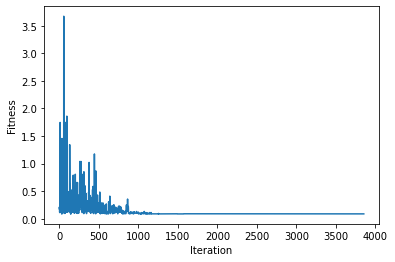

[0.17445267463840008, 0.4803767945471873, 0.29273881675602564, 0.07124925886120059, 0.8709007380103427, 0.6535766092142399]


In [ ]:
if __name__ == "__main__":
    sa = SimAnneal(6, stopping_iter=5000)
    sa.anneal()
    sa.plot_learning()
    print(sa.best_solution)